## Clean Neural Network Implementation

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.6945
Epoch 100, Loss: 0.0478
Epoch 200, Loss: 0.0104
Epoch 300, Loss: 0.0047
Epoch 400, Loss: 0.0027
Epoch 500, Loss: 0.0018
Epoch 600, Loss: 0.0013
Epoch 700, Loss: 0.0010
Epoch 800, Loss: 0.0007
Epoch 900, Loss: 0.0006


## Model Evaluation

In [2]:
with torch.no_grad():
    y_pred_probs = model(X_test)
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = (y_pred == y_test).float().mean()

    print("Sample | True Label | Predicted Label | Probability")
    print("-------|------------|-----------------|------------")
    for i in range(10):
        true = int(y_test[i].item())
        pred = int(y_pred[i].item())
        prob = float(y_pred_probs[i].item())
        print(f"{i:<6} | {true:^10} | {pred:^15} | {prob:.4f}")

    print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")

Sample | True Label | Predicted Label | Probability
-------|------------|-----------------|------------
0      |     0      |        0        | 0.0007
1      |     0      |        0        | 0.0001
2      |     1      |        1        | 0.9995
3      |     1      |        1        | 0.9949
4      |     0      |        0        | 0.0003
5      |     0      |        0        | 0.0002
6      |     0      |        0        | 0.0002
7      |     1      |        1        | 0.9995
8      |     0      |        0        | 0.0003
9      |     0      |        0        | 0.0004

Test Accuracy: 100.00%


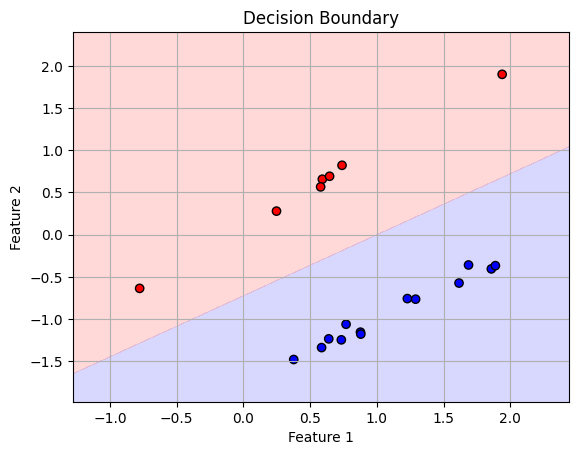

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        probs = model(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, cmap="bwr")
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="bwr", edgecolor="k")
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X_test.numpy(), y_test.numpy())